# Analysis of Video Game Sales Between 2004-2010

Dhruv Kaul

## 1. Introduction

The goal of this analysis is to provide a complete analysis of trends in video games between the years 2004 and 2010. We aim to discover trends that could potentially influence the success of video games. Specifically, we will be looking at the sales of video games and the genre they fall under. 

There are numerous reasons why analyzing this dataset could be useful. Firstly, understanding the patterns that cause video game success is crucial to a multitude of people, such as game developers, stakeholders in the industry, as well as video game influencers. Understanding these trends can lead to increasing the game's marketability, which eventually leads to more profits. Due to this, individuals such as game developers and stakeholders who have invested in these products will undoubtedly find the results of this analysis extremely valuable. 

Within this report, I will answer the following set of research questions:
1.) Is there a relationship between a video game's genre and the sales it generates?
2.) Are there certain genres of video games that tend to have more overall sales than others?
3.) Which genre has the lowest average sales, and which one has the highest?
I believe the research questions above are extremely useful for achieving our goal. Determining if certain genres are correlated with more sales can be very important knowledge for game developers and stakeholders. With this knowledge, they could decide to produce more games in that genre, which would in turn potentially increase their business's profits. Similarly, figuring out what genres have games with the least sales, as well as which genres have the most sales is crucial knowledge that industry leaders could utilize to make data-driven decisions. 

In [1]:
#Imports here
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set()  

In [2]:
df = pd.read_csv('video_games.csv', encoding='ISO-8859-1', na_values = ["unknown"])

In [3]:
df.dtypes

Console                 object
Title                   object
US Sales (millions)    float64
Block4                   int64
Block2                   int64
                        ...   
Platform                 int64
Isometric                int64
SideScrolling            int64
TopDown                  int64
ThirdPerson              int64
Length: 166, dtype: object

## 2. Dataset Discussion

Our dataset contains information about over 1,000 video games between 2004 and 2010. Even so, there could be some potential limitations to our data. For instance, our data could contain missing values. These missing values could skew our statistical summaries/results. Additionally, our data may no longer be relevant. Since this data is regarding video games in the years between 2004 and 2010, it may be outdated, and it could potentially be unrepresentative of our population of intrest. 

In [4]:
df['YearReleased'].min()

2004

In [5]:
df['YearReleased'].max()

2010

This data was originally collected and curated by Dr. Joe Cox. Specifically, the playtime information was
collected from crowd-sourced data on “How Long to Bea"t. The following is a link to where the original data was downloaded: https://researchportal.port.ac.uk/en/datasets/video-games-dataset. I accessed this data through the Project 1 file on jupyter notebook on 2/20/2024. As far as I can tell, there is no codebook available.

In [6]:
df.head(6)

,Console,Title,US Sales (millions),Block4,Block2,Block1,Block0.5,YearReleased,2004,2005,...,Tricks,Volleyball,Wakeboarding,Wrestling,FirstPerson,Platform,Isometric,SideScrolling,TopDown,ThirdPerson
0,Nintendo DS,Super Mario 64 DS,4.69,1,1,1,1,2004,1,0,...,0,0,0,0,0,1,0,0,0,1
1,Sony PSP,Lumines: Puzzle Fusion,0.56,0,0,0,1,2004,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Nintendo DS,WarioWare Touched!,0.54,0,0,0,1,2004,1,0,...,0,0,0,0,0,1,1,1,1,1
3,Sony PSP,Hot Shots Golf: Open Tee,0.49,0,0,0,0,2004,1,0,...,0,0,0,0,0,0,0,0,0,1
4,Nintendo DS,Spider-Man 2,0.45,0,0,0,0,2004,1,0,...,0,0,0,0,0,1,0,1,0,1
5,Nintendo DS,The Urbz: Sims in the City,0.41,0,0,0,0,2004,1,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
df.shape

(1770, 166)

The unit of observation in this dataset is individual video games.

This dataset represents a sample of video games between 2004 and 2010, it does not necessarily contain every video game released within this timeframe. As our population of interest is all video games (including the ones released after 2010), our dataset has some limitations that probits it from being fully representative of our population of interest. Due to the timeframe of the data within this dataset, it is outdated. Thus, the results from our analysis may not be applicable in the modern world. 

The data was collected through crowd-sourced information on "How Long to Beat".

The three variables I will explore in this analysis are US Sales (Millions) (the amount of money the video game produced in sales within the United States), Genre (the genre/category the video game falls in), Year Released (the year the video game was released). Both "US Sales (millions)" and "Year Released" are quantitative variables, whereas "Genre" is a categorical variable.t.

The main limitation of our data is that it is outdated. Our data includes all the necessary information (the three variables listed above) needed to answer our research questions. At this point in my analysis, I do not see any practical or ethical concerns within our dataset. 

## 3. Dataset Cleaning

In [9]:
#Handling missing values
df.isna().sum()

Console                0
Title                  0
US Sales (millions)    0
Block4                 0
Block2                 0
                      ..
Platform               0
Isometric              0
SideScrolling          0
TopDown                0
ThirdPerson            0
Length: 166, dtype: int64

In [10]:
df[['US Sales (millions)', 'YearReleased', 'Genre']].isna().sum()

US Sales (millions)    0
YearReleased           0
Genre                  0
dtype: int64

In [11]:
df_clean = df.dropna()
df_clean.shape

(1770, 166)

As we can see from the code above, our dataset does not contain any missing values. Even so, if our data had missing values it is not always the best option to immediately drop them. If our dataset had missing values, I would use .describe() to find the summary statistics. Then I would drop the missing values and use .describe() once more. If the summary statistics were very similar, it would prove that dropping the missing values did not reduce the representativeness of our data. Thus, in that case, I would drop the missing values.  

In [12]:
#Uncommon Values: categorical variables

In [13]:
df['Genre'].value_counts()

Genre
Action                                                      660
Sports                                                      228
Strategy                                                     91
Action, Role-Playing (RPG)                                   88
Racing / Driving                                             73
Role-Playing (RPG)                                           71
Action, Adventure                                            62
Action, Strategy                                             62
Action, Racing / Driving                                     60
Action, Simulation                                           57
Simulation                                                   50
Adventure                                                    35
Action, Sports                                               34
Role-Playing (RPG), Strategy                                 29
Racing / Driving, Sports                                     25
Simulation, Strategy              

In [14]:
df['Genre'].nunique()

58

In [15]:
df['Genre'] = df['Genre'].replace({'Action, Racing / Driving, Simulation': 'Action, Racing / Driving', 
                                   'Action, Racing / Driving, Sports, Strategy': 'Action, Racing / Driving', 
                                   'Action, Racing / Driving, Strategy': 'Action, Racing / Driving',
                                   'Action, Racing / Driving, Role-Playing (RPG), Strategy': 'Action, Racing / Driving',
                                   'Action, Racing / Driving, Simulation, Sports, Strategy': 'Action, Racing / Driving',
                                   'Action, Racing / Driving, Role-Playing (RPG), Sports': 'Action, Racing / Driving'})

In [17]:
df['Genre'].nunique()

52

In our "Genre" column, there were multiple uncommon values that were related to the "Action, Racing / Driving" genre. As these uncommon variables each only appeared once in our dataset, I incorporated them into the "Action, Racing / Driving" genre. 

In [18]:
#Uncommon Values: quantitative variables

In [19]:
df['US Sales (millions)'].describe()

count    1770.000000
mean        0.479785
std         1.064915
min         0.010000
25%         0.090000
50%         0.190000
75%         0.450000
max        14.660000
Name: US Sales (millions), dtype: float64

Based on the summary statistics of the "US Sales (millions)" column, there are no immediate outliers that stick out to me. Due to this, I have decided to not drop any values from the dataset. From the cleaning process, I do not think our dataset has generated any additional limitations that would affect our analysis down the line. 

## 4. Summarizing Data

Within this section, we are going to answer the question, "Is there a relationship between a video game's genre and the sales it generates?". We will do this by answering the following questions: "Are there certain genres of video games that tend to have more overall sales than others?" and "Which genre has the lowest average sales, and which one has the highest?". 

In [23]:
average_sales_per_genre = df.groupby('Genre')['US Sales (millions)'].mean().reset_index()

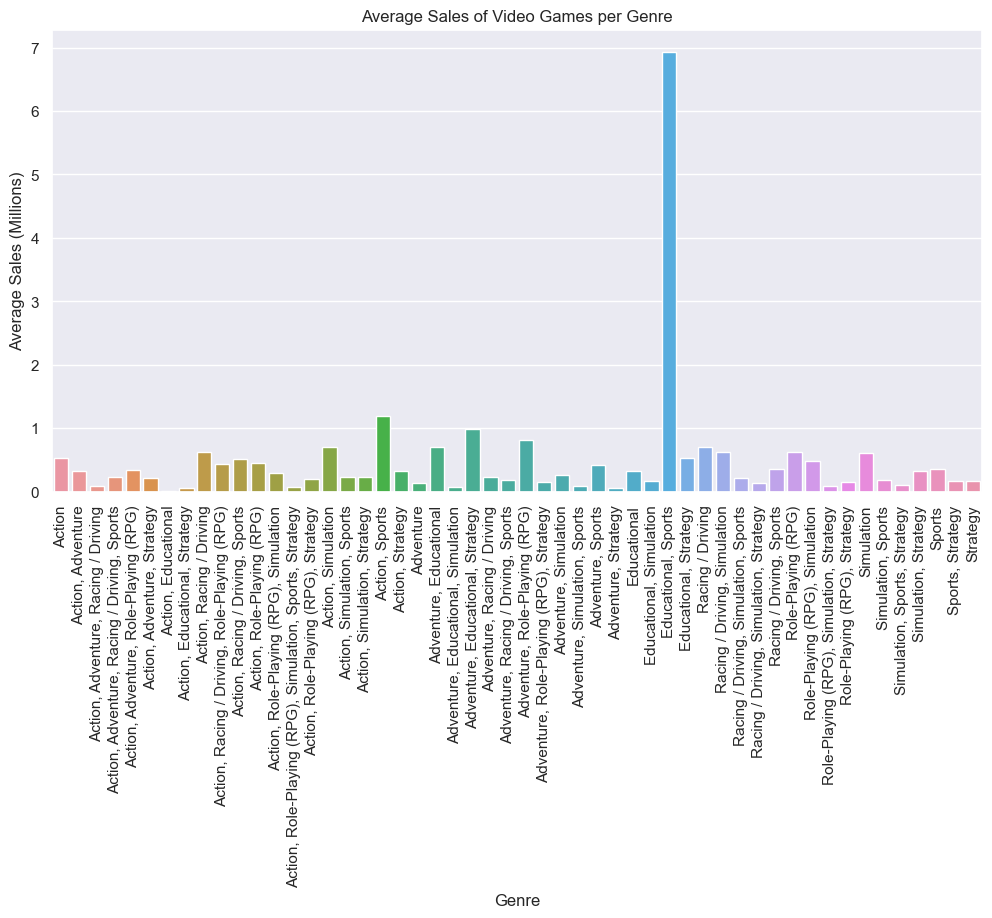

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='US Sales (millions)', data=average_sales_per_genre)
plt.title('Average Sales of Video Games per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Sales (Millions)')
plt.xticks(rotation=90)
plt.show()

This bar chart displays the average amount of sales generated by video games in each genre. It should help us answer our research question, as it will tell us if some genres tend to have a higher amount of sales than others. From the bar chart above, we can see that the "Educational, Sports" genre generates the most amount of sales on average by a substantial amount. However, there are a few things to consider before drawing any conclusions. This bar chart takes the average sales of all the video games by genre. This means that genres with a larger amount of video games will likely have smaller numbers since there would be a lot more video games that did not produce as much sales. On the other hand, if a genre only has a few video games, it has the potential to have massive average sales because of its small sample size. Case in point, the "Educational, Sports" category seems to have over 7 times the average sales of every other genre, however, it only has 3 games within it. 

In [25]:
summary_statistics = df.groupby('Genre')['US Sales (millions)'].describe()
summary_statistics

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,660.0,0.522621,1.028146,0.01,0.0900,0.220,0.4800,11.35
"Action, Adventure",62.0,0.322903,0.501488,0.02,0.0700,0.150,0.4000,2.58
"Action, Adventure, Racing / Driving",4.0,0.087500,0.028723,0.05,0.0800,0.090,0.0975,0.12
"Action, Adventure, Racing / Driving, Sports",2.0,0.235000,0.106066,0.16,0.1975,0.235,0.2725,0.31
"Action, Adventure, Role-Playing (RPG)",7.0,0.345714,0.314158,0.03,0.1500,0.240,0.4500,0.95
"Action, Adventure, Strategy",3.0,0.206667,0.127410,0.06,0.1650,0.270,0.2800,0.29
"Action, Educational",1.0,0.010000,NaN,0.01,0.0100,0.010,0.0100,0.01
"Action, Educational, Strategy",1.0,0.050000,NaN,0.05,0.0500,0.050,0.0500,0.05
"Action, Racing / Driving",66.0,0.617273,1.079761,0.01,0.0700,0.190,0.7175,5.76


As we can see from the summary statistics, the "Educational, Sports" genre only has a count of 3. Due to this small sample size, we cannot say that this genre produces the most sales on average. Based on our bar chart, pretty much all of the other genres have similar average sales. However, we can see that the "Action, Sports" genre produces more than 1 million dollars in sales on average. Furthermore, as seen in the summary statistics, this genre has a count of 34 video games. Additionally, this genre has the highest max sales, as well as the third-highest minimum sales. Due to this, we can conclude that video games in the "Action, Sports" genre are likely to produce a higher number of sales (on average). Thus, to answer our research question, there is no direct relationship between genre and sales, as the average sales per genre depends on other factors such as the amount of video games in that genre. 

## 5. Conclusion

Within this project, we analyzed a dataset that contains information on video games that were released between 2004 and 2010. We aimed to find out whether the genre of a video game has an impact on its sales. We accomplished this by first describing the data and defining our research questions. We then discussed the data limitations and representativeness of our population of interest. Next, we moved on to the data cleaning phase, where we checked for missing values, dealt with uncommon values, and checked for outliers. Finally, we moved on to the summarizing data step where we generated visualizations and summary statistics to answer our research questions. From our analysis, we concluded that there is no direct relationship between genre and sales, as the average sales per genre depends on other factors such as the amount of video games in each genre.   

Our analysis faced numerous limitations. For starters, our data is outdated. The data in our dataset comprises of video games released between the years 2004 and 2010. Even the most recent games in our dataset were released 14 years ago. A challenge I faced in my analysis occurred after making the visualization. The visualization displayed one story, however, before making any conclusion, there were other factors I had to consider. One contextual piece of information that I had to take into account before making any conclusions from my results was the number of video games per genre. It was extremely important for me to do this as if I had not, my conclusions would have been vastly different. My findings will not impact game developers and stakeholders greatly. Although this data displays valuable insights that are related to their industry, at the end of the day, the dataset is outdated. Due to this, the results gathered may not be directly impactful to modern trends. 

Finally, if future work were to be conducted based on this analysis, some potential research questions could be "Are there any patterns that indicate that specific genres will be more popular during certain years", as well as "Is there a relationship between consoles and video game sales (for instance, do certain consoles generally indicate that the game will have higher sales)". 